In [1]:
import numpy as np
import matplotlib.pyplot as plt

from Week2_Rydberg_Atoms.draw_graph import draw_graph
from Week2_Rydberg_Atoms.utils import sanity_check
from abstract_udmis import AbstractUDMIS
from Week2_Rydberg_Atoms.utils import normalize_coordinates

%matplotlib inline

In [2]:
class UDMIS(AbstractUDMIS):
    def __init__(self, u, graph):
        super().__init__()
        self.u, self.graph = u, graph
        self.num_vertices = len(self.graph)
        print(self.num_vertices)
        # initialize system at infinite temperature
        # i.e. vertices are completely random and uncorrelated
        self.occupations = np.random.rand(self.num_vertices) < 0.5
        self.edges = self.find_edges()

    def find_edges(self):
        #num_pairs = int(self.num_vertices*(self.num_vertices)*0.5)
        edges = np.zeros((self.num_vertices, self.num_vertices), dtype=bool)

        for i in range(self.num_vertices-1):
            x_i, y_i = graph[i] # these are the x, y coordinates of the i'th vertex in the graph
            for j in range(i+1, self.num_vertices):
                x_j, y_j = graph[j] # these are the x, y coordinates of the j'th vertex in the graph

                # calculate the distance between vertices
                dij = np.sqrt((x_i - x_j)**2. + (y_i - y_j)**2.)
                if dij <= 1.0:
                    edges[i,j] = True
                    edges[j,i] = True

        return edges

    def energy(self):
        """Returns the energy of the current spin configuration"""
        # interaction term
        interaction_term = 0
        vertex_term = 0
        for i in range(self.num_vertices-1):
            for j in range(i+1, self.num_vertices):

                # check if there is an edge
                if self.edges[i,j]:
                    interaction_term += self.occupations[i]*self.occupations[j]

            vertex_term += self.occupations[i]

        # missed the last vertex
        vertex_term += self.occupations[self.num_vertices-1]

        return u*interaction_term - vertex_term

    def energy_diff(self, i):
        connections = np.where(self.edges[i,:])[0]
        num_adjacent_occupied = sum(self.occupations[connections])

        if self.occupations[i] == 1:
            # flipping an occupied vertex increases the vertex term, decreases the interaction term
            vertex_term_change = 1.
            interaction_term_change = -u*num_adjacent_occupied

        elif self.occupations[i] == 0:
            # flipping an unoccupied vertex decreases the vertex term, increases the interaction term
            vertex_term_change = -1.
            interaction_term_change = u*num_adjacent_occupied

        return interaction_term_change + vertex_term_change

    def rand_vertex(self):
        """Selects a site in the graph at random"""
        return np.random.randint(self.num_vertices)


In [3]:
def Task_add(N, val):
    t = np.arange(N+1)
    T_i = 100
    T_f = 0.01
    T = T_i * ((T_f/T_i) ** ((t/N) ** val))
    y1 = list(range(101))

    for t in range(N+1):
        temp = T[t]
        E = udmis.mc_step(T=temp)

        if t % 10 == 0:
           k = t // 10
           y1[k] = E

        if t == N:
            UO = udmis.occupations

    x1 = range(101)
    plt.plot(x1, y1)
    f = plt.show()

    g = draw_graph(coordinates=graph,
                   radius=0.5,
                   answer=UO)

    h = sanity_check(graph, answer=UO, radius=0.5)

    return h



17


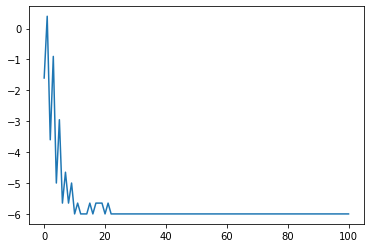

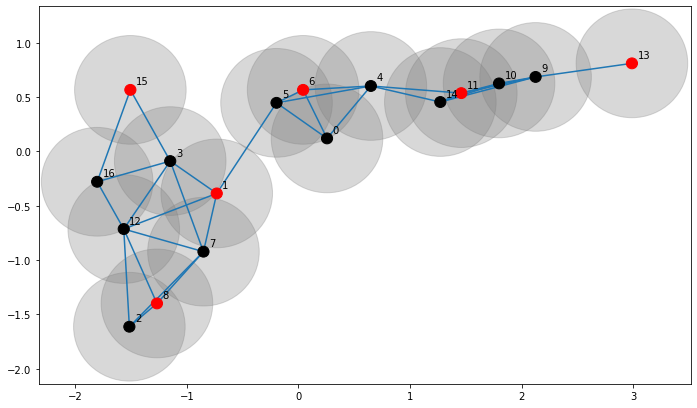

(0, 6)

In [6]:
# Toronto

graph_Toronto = [(-79.3733, 43.7417), (-79.65, 43.6), (-79.8692, 43.2567), (-79.7667, 43.6833), (-79.2633, 43.8767), (-79.5, 43.8333), (-79.4333, 43.8667), (-79.6833, 43.45), (-79.8, 43.3167), (-78.85, 43.9), (-78.9417, 43.8833), (-79.0364, 43.8583), (-79.8833, 43.5083), (-78.6083, 43.935), (-79.089, 43.8354), (-79.8667, 43.8667), (-79.95, 43.63)]

graph = normalize_coordinates(graph_Toronto, radius=0.14)

u = 1.35
udmis = UDMIS(u, graph)

Task_add(1000, 1/5)


21


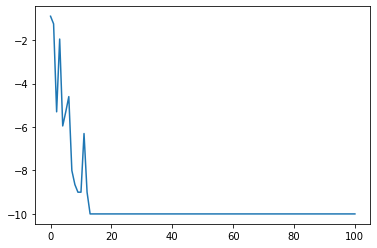

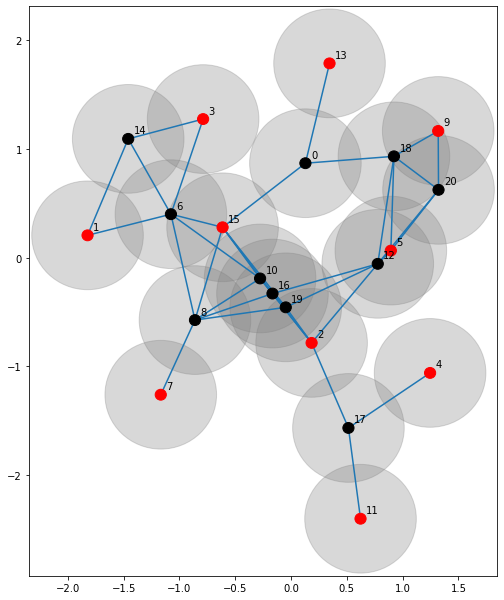

(0, 10)

In [7]:
# Seoul

graph_seoul = [(127.0, 37.5833), (126.6486, 37.4639), (127.01, 37.2858), (126.835, 37.6564), (127.2011, 37.2361), (127.1378, 37.4386), (126.7831, 37.4989), (126.7667, 37.2), (126.8219, 37.3236), (127.2142, 37.6367), (126.9269, 37.3925), (127.0889, 36.9947), (127.1167, 37.4167), (127.0389, 37.7486), (126.7142, 37.6236), (126.8664, 37.4772), (126.9469, 37.3675), (127.0694, 37.145), (127.1428, 37.5947), (126.9683, 37.3447), (127.2147, 37.5392)]
graph = normalize_coordinates(graph_seoul, radius=0.09)

u = 1.35
udmis = UDMIS(u, graph)

Task_add(1000, 1/5)